In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering  
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
#from sklearn import datasets

<p><strong>BIPOC</strong>: t&eacute;rmino para refererirse a grupos sociales que sufren discriminaci&oacute;n racial en EEUU: personas negras, de color e &iacute;ndigenas. Tambi&eacute;n la discriminaci&oacute;n de personas no blancas como son los asi&aacute;ticos o latinos.</p>

<p><strong>EXPLICACI&Oacute;N DE LAS COLUMNAS DE CADA GRUPO</strong></p>
<p><span style="text-decoration: underline;">Brand</span>: marca<br /><span style="text-decoration: underline;">Brand_short</span>: nombre corto<br /><span style="text-decoration: underline;">Product</span>: Producto m&aacute;s vendido<br /><span style="text-decoration: underline;">Product_short</span>: nombre corto<br /><span style="text-decoration: underline;">Hex</span>: Es el c&oacute;digo del color hexadecimal de ese tono<br /><span style="text-decoration: underline;">H</span>: matiz del color (cambio en el color)<br /><span style="text-decoration: underline;">S</span>: saturaci&oacute;n del color (pureza y la nitidez de un color) valor + alto --&gt; mayor saturaci&oacute;n (tonos de piel m&aacute;s claros)<br /><span style="text-decoration: underline;">V</span>: valor/luminosidad (la luminosidad indica si una l&iacute;nea de base de maquillaje se dirige a tonos de piel m&aacute;s claros o m&aacute;s oscuros) valor + alto ---&gt; mayor luminosidad<br /><span style="text-decoration: underline;">L</span>: luminosidad</p>
<p><strong>GRUPOS</strong>: <br />0: Base PRO FILT'R de Fenty Beauty &uacute;nicamente<br />1: Base Ultra HD de Make Up For Ever &uacute;nicamente<br />3: Marcas recomendadas por BIPOC con fundadores de BIPOC<br />4: Marcas recomendadas por BIPOC con White Founders<br />************************************************************************************************************************<br />2: Best Sellers de EE. UU.<br />5: Los m&aacute;s vendidos de Nigeria<br />6: Best Sellers japoneses<br />7: Best Sellers de la India</p>

## <p>OBJETIVO: SIMILITUD ENTRE LAS MARCAS </p>

In [3]:
shades = pd.read_csv('shades.csv')
shades

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2
...,...,...,...,...,...,...,...,...,...,...
620,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7
621,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7
622,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7
623,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7


In [4]:
# Encontramos datos vacios 
shades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          625 non-null    object 
 1   brand_short    625 non-null    object 
 2   product        625 non-null    object 
 3   product_short  625 non-null    object 
 4   hex            625 non-null    object 
 5   H              613 non-null    float64
 6   S              613 non-null    float64
 7   V              613 non-null    float64
 8   L              625 non-null    int64  
 9   group          625 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 49.0+ KB


In [6]:
# las filas 155-166 se encuentran con NaN (12 filas)
# Se decide que se quiere borrar porque son datos necesesarios para poder agrupar 
eliminar = shades[shades['H'].isna()]
shades = shades.drop(eliminar.index, axis=0)
shades

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2
...,...,...,...,...,...,...,...,...,...,...
620,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7
621,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7
622,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7
623,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7


In [8]:
#Se cambia los nombres de los grupos para facilitar el trabajo 
dicc = ({0:'Base PRO FILT-R de Fenty Beauty únicamente',
       1:'Base Ultra HD de Make Up For Ever únicamente',
       2:'BS EEUU',
        3:'Marcas recomendadas por BIPOC con fundadores de BIPOC',
         4:'Marcas recomendadas por BIPOC con White Founders',
         5:'BS Nigeria',
         6:'BS japoneses',
         7:'BS India'})
shades['prueba'] = shades.group.map(dicc)
shades['brand'].replace(["L'Oréal"], 'LOreal', inplace=True)
shades

,brand,brand_short,product,product_short,hex,H,S,V,L,group,prueba
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2,BS EEUU
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2,BS EEUU
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2,BS EEUU
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2,BS EEUU
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2,BS EEUU
...,...,...,...,...,...,...,...,...,...,...,...
620,LOreal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7,BS India
621,LOreal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7,BS India
622,LOreal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7,BS India
623,LOreal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7,BS India


## <p>REPRESENTACIONES GRÁFICAS </p>

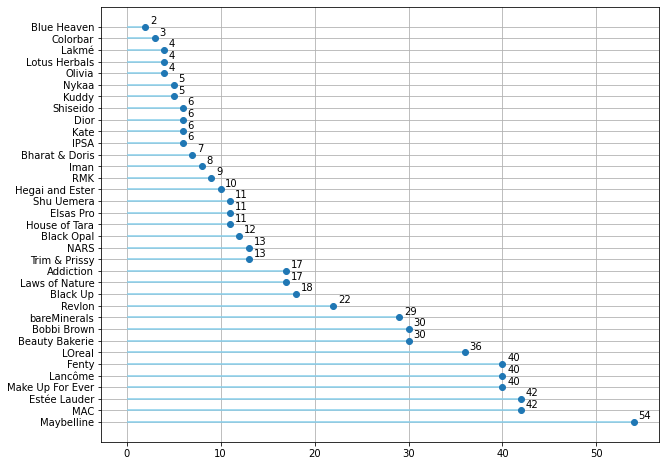

In [9]:
#Contabilizamos la cantidad de productos que hay por marca
counter = shades[['brand','brand_short']].groupby(['brand']).count().reset_index().sort_values('brand_short', ascending= False)
fig, ax = plt.subplots(figsize=(10,8))
y = counter['brand']
x = counter['brand_short']
ax.hlines(y, xmin=0, xmax=x, color='skyblue')
for i, v in enumerate(x): 
    ax.text(v + 0.5, i + .25, str(v)) 
ax.grid()
ax.plot(x, y, "o")
plt.show()

In [10]:
# Queremos ver la cantidad de best seller por grupo
marcas = shades[['brand', 'prueba']].groupby(['prueba']).count().sort_values('brand', ascending= False)
marcas.reset_index(inplace=True)
marcas

,prueba,brand
0,BS EEUU,155
1,Marcas recomendadas por BIPOC con White Founders,112
2,Marcas recomendadas por BIPOC con fundadores d...,85
3,BS japoneses,74
4,BS India,57
5,BS Nigeria,50
6,Base PRO FILT-R de Fenty Beauty únicamente,40
7,Base Ultra HD de Make Up For Ever únicamente,40


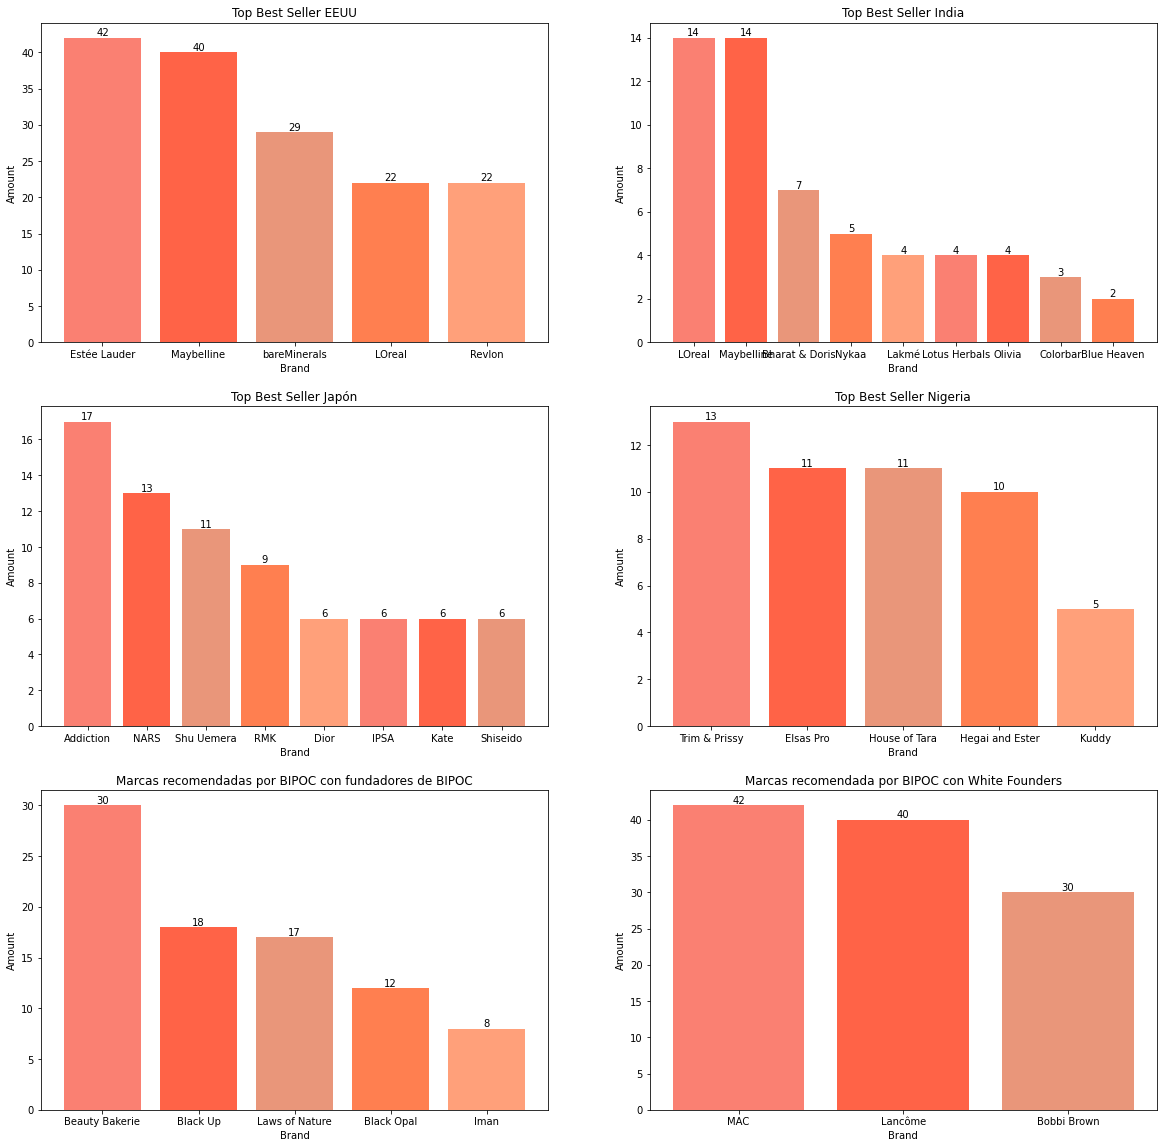

In [11]:
#Queremos ver  cuales son las marcas de maquillaje más vendida por grupo
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))   
eeuu = shades[shades['prueba']=='BS EEUU'][['brand','product' ]].groupby(['brand']).count().sort_values('product', ascending= False)
eeuu.reset_index(inplace=True)
x = eeuu['brand']
y = eeuu['product']
in_ = shades[shades['prueba']=='BS India'].sort_values(by=['product'])[['brand','product' ]].groupby(['brand']).count().sort_values('product', ascending= False)
in_.reset_index(inplace=True)
x1 = in_['brand']
y1 = in_['product']
jap = shades[shades['prueba']=='BS japoneses'][['brand','product' ]].groupby(['brand']).count().sort_values('product', ascending= False)
jap.reset_index(inplace=True)
x2 = jap['brand']
y2 = jap['product']
nig = shades[shades['prueba']=='BS Nigeria'][['brand','product' ]].groupby(['brand']).count().sort_values('product', ascending= False)
nig.reset_index(inplace=True)
x3 = nig['brand']
y3 = nig['product']
bipoc = shades[shades['prueba']=='Marcas recomendadas por BIPOC con fundadores de BIPOC'][['brand','product' ]].groupby(['brand']).count().sort_values('product', ascending= False)
bipoc.reset_index(inplace=True)
x4 = bipoc['brand']
y4 = bipoc['product']
white = shades[shades['prueba']=='Marcas recomendadas por BIPOC con White Founders'][['brand','product' ]].groupby(['brand']).count().sort_values('product', ascending= False)
white.reset_index(inplace=True)
x5 = white['brand']
y5 = white['product']


ax[0,0].bar(x ,y , color= ['salmon', 'tomato','darksalmon','coral','lightsalmon' ])
for i in range(len(y)):
    ax[0,0].text(i, y[i], y[i], ha='center', va='bottom')
ax[0,0].set_xlabel('Brand')
ax[0,0].set_ylabel('Amount')
ax[0,0].set_title('Top Best Seller EEUU')

ax[0,1].bar(x1 ,y1 , color= ['salmon', 'tomato','darksalmon','coral','lightsalmon' ])
for i in range(len(y1)):
    ax[0,1].text(i, y1[i], y1[i], ha='center', va='bottom')
ax[0,1].set_xlabel('Brand')
ax[0,1].set_ylabel('Amount')
ax[0,1].set_title('Top Best Seller India')

ax[1,0].bar(x2,y2 , color= ['salmon', 'tomato','darksalmon','coral','lightsalmon' ])
for i in range(len(y2)):
    ax[1,0].text(i, y2[i], y2[i], ha='center', va='bottom')
ax[1,0].set_xlabel('Brand')
ax[1,0].set_ylabel('Amount')
ax[1,0].set_title('Top Best Seller Japón')

ax[1,1].bar(x3,y3 , color= ['salmon', 'tomato','darksalmon','coral','lightsalmon' ])
for i in range(len(y3)):
    ax[1,1].text(i, y3[i], y3[i], ha='center', va='bottom')
ax[1,1].set_xlabel('Brand')
ax[1,1].set_ylabel('Amount')
ax[1,1].set_title('Top Best Seller Nigeria')

ax[2,0].bar(x4,y4 , color= ['salmon', 'tomato','darksalmon','coral','lightsalmon' ])
for i in range(len(y4)):
    ax[2,0].text(i, y4[i], y4[i], ha='center', va='bottom')
ax[2,0].set_xlabel('Brand')
ax[2,0].set_ylabel('Amount')
ax[2,0].set_title('Marcas recomendadas por BIPOC con fundadores de BIPOC')

ax[2,1].bar(x5,y5 , color= ['salmon', 'tomato','darksalmon','coral','lightsalmon' ])
for i in range(len(y5)):
    ax[2,1].text(i, y5[i], y5[i], ha='center', va='bottom')
ax[2,1].set_xlabel('Brand')
ax[2,1].set_ylabel('Amount')
ax[2,1].set_title('Marcas recomendada por BIPOC con White Founders')


plt.show()

## <p>ESTUDIO EN PROFUNDIDAD DE LOS PRODUCTOS</p>
<p>Transformamos el color hexadecimal al color RGB</p>

In [12]:
shades2 = shades.copy()

In [13]:
shades2['RGB'] = shades2['hex'].apply(lambda x: tuple(int(x[i:i+2], 16) for i in (0, 2, 4)))
shades2['R'] = shades2["RGB"].map(lambda x:x[0])
shades2['G'] = shades2["RGB"].map(lambda x:x[1])
shades2['B'] = shades2["RGB"].map(lambda x:x[2])
shades2 = shades2.drop(['RGB'], axis=1)

In [14]:
EEUU = shades2[shades2['prueba']=='BS EEUU']
India = shades2[shades2['prueba']=='BS India']
Nigeria = shades2[shades2['prueba']=='BS Nigeria']
BIPOC_BIPOC = shades2[shades2['prueba']=='Marcas recomendadas por BIPOC con fundadores de BIPOC']
BIPOC_WHITE = shades2[shades2['prueba']=='Marcas recomendadas por BIPOC con White Founders']

In [15]:
shades2

,brand,brand_short,product,product_short,hex,H,S,V,L,group,prueba,R,G,B
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2,BS EEUU,243,207,179
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2,BS EEUU,255,227,194
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2,BS EEUU,255,224,205
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2,BS EEUU,255,211,190
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2,BS EEUU,189,149,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,LOreal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7,BS India,238,207,186
621,LOreal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7,BS India,232,199,184
622,LOreal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7,BS India,240,203,185
623,LOreal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7,BS India,233,196,177


In [ ]:
# H: tono del color
# V: valor 
# S: saturación del color (mas o menos puro),+ alto tonos más claros, + bajo tonos más oscuros 
# L: luminosidad del color (más luz tonos de piel más claros)

## <p>- Tonos medios de productos por grupo</p>

In [16]:
EEUU[['brand','H','S','V','L','R','G','B']].groupby(['brand']).agg([np.mean])

,H,S,V,L,R,G,B
,mean,mean,mean,mean,mean,mean,mean
brand,,,,,,,
Estée Lauder,26.047619,0.535238,0.761190,62.404762,193.928571,138.404762,95.738095
LOreal,25.090909,0.495000,0.785455,65.681818,200.545455,148.954545,109.818182
Maybelline,24.375000,0.420250,0.722500,61.775000,184.200000,141.600000,111.025000
Revlon,21.454545,0.393636,0.850455,71.409091,216.727273,162.772727,132.136364
bareMinerals,29.310345,0.447931,0.765862,66.241379,195.379310,152.586207,111.620690


In [ ]:
India[['brand','H','S','V','L','R','G','B']].groupby(['brand']).agg([np.mean])

In [ ]:
Nigeria[['brand','H','S','V','L','R','G','B']].groupby(['brand']).agg([np.mean])

In [ ]:
BIPOC_BIPOC[['brand','H','S','V','L','R','G','B']].groupby(['brand']).agg([np.mean])

In [ ]:
BIPOC_WHITE[['brand','H','S','V','L','R','G','B']].groupby(['brand']).agg([np.mean])

## <p>- Aplicación KMeans</p>
<p>Queremos clasificar en grupos los maquillajes según su similitud en base a los códigos del color RGB y HSVL</p>

In [30]:
dfcluster = shades2.copy()
dfcluster = dfcluster.drop(["brand", "brand_short", "product", "product_short", "hex", "group", "prueba" ], axis = 1)
X = dfcluster
dfcluster

,H,S,V,L,R,G,B
0,26.0,0.26,0.95,86,243,207,179
1,32.0,0.24,1.00,92,255,227,194
2,23.0,0.20,1.00,91,255,224,205
3,19.0,0.25,1.00,88,255,211,190
4,18.0,0.30,0.74,65,189,149,132
...,...,...,...,...,...,...,...
620,24.0,0.22,0.93,85,238,207,186
621,19.0,0.21,0.91,83,232,199,184
622,20.0,0.23,0.94,85,240,203,185
623,20.0,0.24,0.91,82,233,196,177


In [31]:
#Escalamos datos
scaler =  MinMaxScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X, columns=['H','S','V','L','R','G','B'])
X

,H,S,V,L,R,G,B
0,0.536585,0.177778,0.9375,0.892857,0.941463,0.865741,0.785088
1,0.682927,0.155556,1.0000,0.964286,1.000000,0.958333,0.850877
2,0.463415,0.111111,1.0000,0.952381,1.000000,0.944444,0.899123
3,0.365854,0.166667,1.0000,0.916667,1.000000,0.884259,0.833333
4,0.341463,0.222222,0.6750,0.642857,0.678049,0.597222,0.578947
...,...,...,...,...,...,...,...
608,0.487805,0.133333,0.9125,0.880952,0.917073,0.865741,0.815789
609,0.365854,0.122222,0.8875,0.857143,0.887805,0.828704,0.807018
610,0.390244,0.144444,0.9250,0.880952,0.926829,0.847222,0.811404
611,0.390244,0.155556,0.8875,0.845238,0.892683,0.814815,0.776316


In [32]:
inercias = []   
for k in range(1,11): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

D:\ARCHIVOS DE PROGRAMA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[169.71160040102757,
 60.759222057755814,
 38.48542627059363,
 29.703377545542338,
 25.2526223644824,
 22.08407702414799,
 20.174908426788722,
 18.65309166675197,
 17.2465049913703,
 15.91961137973545]

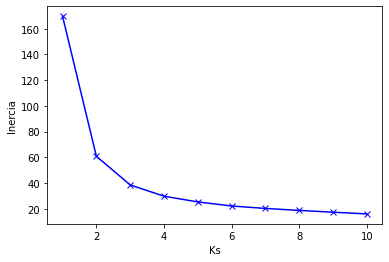

In [33]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

<p>Creamos las etiquetas en base al número de clusters, en este caso probamos con 3, 4 y 5 para ver cuál se ajusta más</p>

<p><strong>-N&uacute;mero de clusters: 3</strong></p>

In [34]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
from collections import Counter
Counter(kmeans3.labels_)

Counter({2: 289, 0: 208, 1: 116})

In [28]:
kmeans3.cluster_centers_

array([[ 26.80952381,   0.33117216,   0.91472527,  80.48717949,
        233.30769231, 190.9010989 , 156.29304029],
       [ 21.265625  ,   0.63789063,   0.49679687,  37.7265625 ,
        126.6171875 ,  75.484375  ,  45.7890625 ],
       [ 25.83490566,   0.5170283 ,   0.77617925,  63.41509434,
        197.96226415, 140.04245283,  95.75943396]])

In [35]:
centroides_maquillaje1 = scaler.inverse_transform(kmeans3.cluster_centers_)
centroides_maquillaje1 = pd.DataFrame(data = centroides_maquillaje1 , columns = [dfcluster.columns])
centroides_maquillaje1 

,H,S,V,L,R,G,B
0,25.725962,0.530817,0.763317,62.057692,194.668269,136.096154,91.596154
1,20.681034,0.636638,0.481121,36.318966,122.637931,72.344828,44.551724
2,26.878893,0.337059,0.911003,80.017301,232.356401,189.505190,154.359862


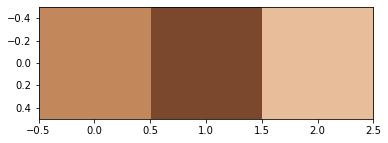

In [36]:
x1  = np.array([[[194, 136, 91],
                 [123, 72, 45],
                [232, 190, 154]]])

plt.imshow(x1)

<p><strong>-N&uacute;mero de clusters: 4</strong></p>

In [38]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X)
Counter(kmeans4.labels_)

Counter({1: 188, 0: 204, 3: 119, 2: 102})

In [39]:
kmeans4.cluster_centers_

array([[0.54866093, 0.38447712, 0.80416667, 0.71364379, 0.8053802 ,
        0.65627269, 0.52158583],
       [0.5601972 , 0.22287234, 0.91742021, 0.85821935, 0.91800727,
        0.8287037 , 0.73100971],
       [0.4033955 , 0.59651416, 0.32818627, 0.28396359, 0.3312769 ,
        0.22798656, 0.18825249],
       [0.5066612 , 0.53510738, 0.62247899, 0.5290116 , 0.62430826,
        0.45183629, 0.32647796]])

In [40]:
centroides_maquillaje2 = scaler.inverse_transform(kmeans4.cluster_centers_)
centroides_maquillaje2 = pd.DataFrame(data = centroides_maquillaje2 , columns = [dfcluster.columns])
centroides_maquillaje2

,H,S,V,L,R,G,B
0,26.495098,0.446029,0.843333,70.946078,215.102941,161.754902,118.921569
1,26.968085,0.300585,0.933936,83.090426,238.191489,199.000000,166.670213
2,20.539216,0.636863,0.462549,34.852941,117.911765,69.245098,42.921569
3,24.773109,0.581597,0.697983,55.436975,177.983193,117.596639,74.436975


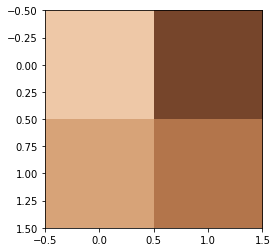

In [41]:
x2  = np.array([[[238, 200, 167],
                 [118, 69, 43]],
                 [[215, 163, 120],
                 [179, 117, 75]]])

plt.imshow(x2) 

<p><strong>-N&uacute;mero de clusters: 5</strong></p>

In [43]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X)
Counter(kmeans5.labels_)

Counter({3: 147, 1: 201, 0: 124, 2: 87, 4: 54})

In [44]:
kmeans5.cluster_centers_

array([[0.51907946, 0.49964158, 0.69334677, 0.59101382, 0.69516129,
        0.5162037 , 0.37896152],
       [0.55066133, 0.34693201, 0.82941542, 0.74532101, 0.8304332 ,
        0.69384559, 0.56681505],
       [0.46677881, 0.57266922, 0.48031609, 0.40996169, 0.48236613,
        0.33780332, 0.24873967],
       [0.56479177, 0.20408163, 0.92942177, 0.87536443, 0.92998175,
        0.8494583 , 0.75608665],
       [0.37037037, 0.61748971, 0.24027778, 0.21119929, 0.24399277,
        0.16606653, 0.15147823]])

In [45]:
centroides_maquillaje3 = scaler.inverse_transform(kmeans5.cluster_centers_)
centroides_maquillaje3 = pd.DataFrame(data = centroides_maquillaje3 , columns = [dfcluster.columns])
centroides_maquillaje3

,H,S,V,L,R,G,B
0,25.282258,0.549677,0.754677,60.645161,192.508065,131.500000,86.403226
1,26.577114,0.412239,0.863532,73.606965,220.238806,169.870647,129.233831
2,23.137931,0.615402,0.584253,45.436782,148.885057,92.965517,56.712644
3,27.156463,0.283673,0.943537,84.530612,240.646259,203.482993,172.387755
4,19.185185,0.655741,0.392222,28.740741,100.018519,55.870370,34.537037


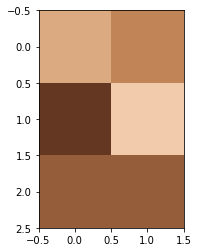

In [46]:
x3  = np.array([[[220, 170, 129],
                 [192, 132, 86]],
                 [[100, 55, 34],
                 [241, 203, 172]],
                [[149, 93, 57],
                [149, 93, 57]]])

plt.imshow(x3)

## <p>- Decidimos quedarnos con 4 cluster</p>

In [ ]:
Counter(kmeans4.labels_)

In [ ]:
#clase 0: café claro
#clase 1: negro
#clase 2: café medio 
#clase 3: café oscuro

In [47]:
#Añadimos a cada producto la etiqueta al grupo al que pertenece
dfcluster['clase'] = kmeans4.labels_
dfcluster

,H,S,V,L,R,G,B,clase
0,26.0,0.26,0.95,86,243,207,179,1
1,32.0,0.24,1.00,92,255,227,194,1
2,23.0,0.20,1.00,91,255,224,205,1
3,19.0,0.25,1.00,88,255,211,190,1
4,18.0,0.30,0.74,65,189,149,132,0
...,...,...,...,...,...,...,...,...
620,24.0,0.22,0.93,85,238,207,186,1
621,19.0,0.21,0.91,83,232,199,184,1
622,20.0,0.23,0.94,85,240,203,185,1
623,20.0,0.24,0.91,82,233,196,177,1


D:\ARCHIVOS DE PROGRAMA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


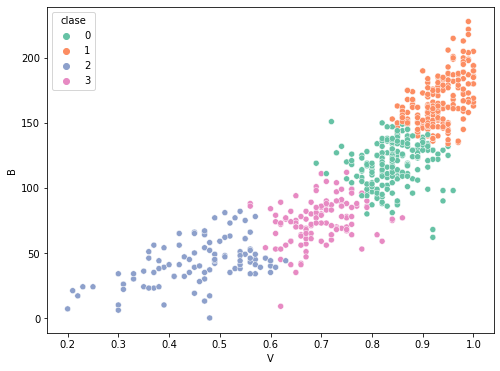

In [48]:
#Representación gráfica para comprobar si los clusters se han diferenciado bien
plt.figure(figsize=(8,6))
sns.scatterplot(dfcluster.V,dfcluster.B,hue = dfcluster.clase, palette="Set2")
plt.show()

In [49]:
# Añadimos nuestra etiqueta al df original
shades3 = shades.copy()
shades3['Tono_piel']=dfcluster["clase"]
shades3

,brand,brand_short,product,product_short,hex,H,S,V,L,group,prueba,Tono_piel
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2,BS EEUU,1
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2,BS EEUU,1
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2,BS EEUU,1
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2,BS EEUU,1
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2,BS EEUU,0
...,...,...,...,...,...,...,...,...,...,...,...,...
620,LOreal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7,BS India,1
621,LOreal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7,BS India,1
622,LOreal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7,BS India,1
623,LOreal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7,BS India,1


## <p>ENTRENAR EL MODELO CON UN DECISION TREE</p>

In [50]:
shades3 = shades3.drop(['brand','product','hex','prueba'], axis=1)
shades3

,brand_short,product_short,H,S,V,L,group,Tono_piel
0,mb,fmf,26.0,0.26,0.95,86,2,1
1,mb,fmf,32.0,0.24,1.00,92,2,1
2,mb,fmf,23.0,0.20,1.00,91,2,1
3,mb,fmf,19.0,0.25,1.00,88,2,1
4,mb,fmf,18.0,0.30,0.74,65,2,0
...,...,...,...,...,...,...,...,...
620,lo,tms,24.0,0.22,0.93,85,7,1
621,lo,tms,19.0,0.21,0.91,83,7,1
622,lo,tms,20.0,0.23,0.94,85,7,1
623,lo,tms,20.0,0.24,0.91,82,7,1


In [51]:
#Codificamos las etiquetas categóricas en etiquetas numéricas
encoder = LabelEncoder()
shades3.brand_short= encoder.fit_transform(shades3.brand_short)
shades3.product_short= encoder.fit_transform(shades3.product_short)
shades3

,brand_short,product_short,H,S,V,L,group,Tono_piel
0,25,7,26.0,0.26,0.95,86,2,1
1,25,7,32.0,0.24,1.00,92,2,1
2,25,7,23.0,0.20,1.00,91,2,1
3,25,7,19.0,0.25,1.00,88,2,1
4,25,7,18.0,0.30,0.74,65,2,0
...,...,...,...,...,...,...,...,...
620,23,32,24.0,0.22,0.93,85,7,1
621,23,32,19.0,0.21,0.91,83,7,1
622,23,32,20.0,0.23,0.94,85,7,1
623,23,32,20.0,0.24,0.91,82,7,1


In [53]:
X = np.array(shades3.iloc[:,:7])
y = np.array(shades3.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

((429, 7), (184, 7))

In [ ]:
#tamaño train y test
X_train.shape, X_test.shape

## <p>- REPRESENTACIÓN DE MI ÁRBOL DE DECISIÓN </p>

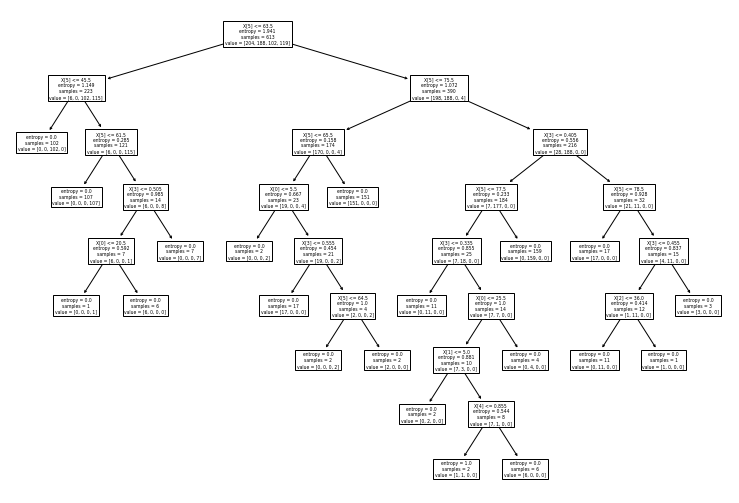

In [55]:
#criterio entropy: se utiliza para probabilidades y trabaja con dator ordenados
#criterio de gini: trabaja con datos desordenados que no tienen una coherencia específica
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=8)
plt.figure(figsize=(13, 9))
tree.plot_tree(clf.fit(shades3.iloc[:,:7], shades3.iloc[:,-1:])) 
plt.show() 

In [57]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state = 0) 
clf = clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat #datos predichos

array([0, 0, 0, 2, 0, 3, 1, 1, 1, 0, 2, 1, 1, 2, 0, 3, 0, 3, 1, 0, 0, 0,
       2, 3, 3, 0, 2, 0, 3, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 3, 1, 0, 3, 2,
       0, 0, 1, 1, 3, 3, 1, 2, 2, 0, 3, 2, 2, 3, 0, 3, 1, 1, 3, 1, 0, 1,
       2, 1, 0, 3, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 3, 2, 1, 3, 3, 1, 1, 0,
       1, 3, 1, 1, 2, 2, 3, 2, 0, 0, 2, 3, 0, 0, 1, 0, 3, 3, 0, 2, 1, 0,
       1, 1, 0, 3, 2, 2, 1, 0, 1, 1, 3, 3, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 3, 3, 3, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 3, 3, 3, 0, 0, 0, 1,
       0, 0, 1, 0, 3, 3, 3, 1])

In [58]:
y_test #datos reales

array([0, 0, 0, 2, 0, 3, 1, 1, 1, 0, 2, 1, 1, 2, 0, 3, 0, 3, 1, 0, 0, 0,
       2, 3, 3, 0, 2, 0, 3, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 3, 1, 0, 3, 2,
       0, 0, 1, 1, 3, 3, 1, 2, 2, 0, 0, 2, 2, 3, 0, 3, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 3, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 3, 2, 1, 3, 3, 1, 1, 0,
       1, 3, 1, 1, 2, 2, 3, 2, 0, 0, 2, 3, 0, 0, 1, 0, 3, 3, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 3, 3, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 3, 3, 3, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 2, 3, 0, 3, 0, 0, 0, 1,
       0, 0, 1, 0, 3, 3, 3, 1])

## <p>- EVALUACIÓN DEL MODELO </p>

In [59]:
matriz_confusion= confusion_matrix(y_test, yhat)
matriz_confusion

array([[58,  1,  0,  4],
       [ 0, 54,  0,  0],
       [ 0,  0, 35,  0],
       [ 1,  0,  0, 31]], dtype=int64)

In [62]:
# Accuracy: 
accuracy_score(y_test, yhat)

0.967391304347826

In [65]:
# Precision
precision_score(y_test, yhat, average=None)

array([0.98305085, 0.98181818, 1.        , 0.88571429])